# Homework 4

- Execute the below code, then answer the numbered questions.

In [1]:
#imports all the packages and prints df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df

,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0
...,...,...,...,...,...,...,...
9050,NaN,automatic,il,4.2,41186.0,NaN,11600.0
9051,ford,automatic,fl,NaN,38810.0,16250.0,17300.0
9052,nissan,NaN,ga,4.7,4551.0,12500.0,13800.0
9053,ford,automatic,il,4.6,33114.0,21800.0,27000.0


In [2]:
#prints info() of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [3]:
#prints the shape of df
df.shape

(9055, 7)

In [4]:
#split the data into training and test data
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [5]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
cat_vars = ['make','transmission','state']
num_vars = ['condition','odometer','auction_value']

## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [7]:
# insert code here
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])


## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [8]:
# insert code here
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [9]:
# insert code here
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['condition', 'odometer', 'auction_value']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['make', 'transmission', 'state'])])


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [10]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                  

In [11]:
car_predictions = modeling_pipeline.predict(X_test)
car_predictions

array([15288.72275701, 17767.59012455, 15019.81295845, ...,
       17117.19265722, 11351.57593288, 20851.97167129])

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,car_predictions)
mse

6998122.143264069

In [13]:
rmse = np.sqrt(mse)
rmse

2645.3964056950085

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, car_predictions)
r2

0.8838274405991853

The R2 of 0.884 is using the test data.

## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

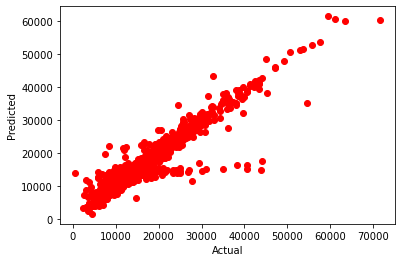

In [15]:
# insert code here
import matplotlib.pyplot as plt

plt.plot(y_test, car_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

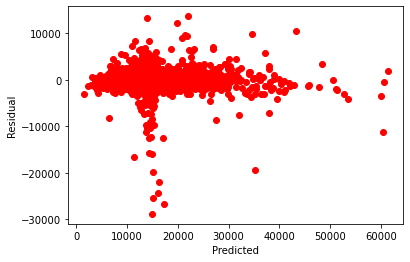

In [16]:
plt.plot(car_predictions, car_predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

Insert description here.

Observations:

1) If this was a perfect model, the residuals would be 0 for all actual/predicted values.
2) In the above Residual/predicted graph , clearly we can observe residuals is 0 for all the predicted values, only few outliers present..  
3) for the predicted values of range (10000 - 20000), the model is neglecting to pick-up and there is negative residual.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [17]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=100))])
modeling_pipeline_ridge.fit(X_train, y_train)
modeling_pipeline_ridge['ridge'].coef_

array([ 9.01235380e+02, -2.21760476e+02,  6.86465341e+03, -3.12413710e+02,
       -3.72380488e+02, -3.05445419e+02, -2.69794448e+02, -1.86398005e+02,
       -7.33128946e+02, -9.05948960e+02, -6.35796586e+02, -1.86033629e+02,
       -3.33173002e+02,  3.49919821e+02,  4.21217076e+02,  3.11284609e+01,
        9.49969452e+01, -7.39997343e+01,  1.24546801e+02, -3.40506757e+02,
        2.31197544e+00, -2.35693863e+02, -4.17676766e+02,  1.34011435e+02,
       -9.59909962e+01,  4.22809984e+02,  1.16124616e+02, -1.86057720e+02,
        1.21282524e+02, -5.66385629e+01, -4.41416970e+00,  3.55832878e+02,
       -3.49303228e+02, -1.21324048e+02, -7.93074276e+01, -1.21615062e+02,
       -3.91386616e+02, -1.73769436e+02,  3.30477585e+02,  1.54770345e+02,
       -5.63228709e+01, -1.31283703e+02,  7.32283808e+00,  1.06959101e+02])

In [18]:
modeling_pipeline['lm'].coef_

array([  887.27570125,  -225.88045922,  6817.22027756, -2031.21325773,
       -2258.08086629, -2066.5169624 , -1977.6048662 , -1939.85949453,
       -2645.77632729, -2881.12967478, -2439.73352465, -1881.48900664,
        -550.68502911,   154.65636029,   720.37924264,  -110.31943645,
         -31.25678158,  -823.63499591,    83.03880286,  -804.38590729,
         -31.26285241,  -920.26227983,  -849.52479441,   109.44638114,
        -191.16095889,   441.92452674,   575.46189368,  -341.51288002,
         257.63433966,  -274.74458504,  -546.95093021,   301.03272243,
        -816.96442388,  -403.11084951,  -793.08276616,  -231.64936541,
       -1843.22790698,  -629.60194946,   347.37964999,    91.24090419,
        -454.03525308,  -295.42182761,  -100.24196871,   -27.36534138])

In [19]:
from collections import defaultdict
alphas = [0, 1, 2, 5, 10, 50]

ridge_results = defaultdict(dict)

for alph in alphas:
    modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=100))])
    modeling_pipeline_ridge.fit(X_train, y_train)
    ridge_results['coefficients'][alph] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][alph] = modeling_pipeline_ridge.score(X_train, y_train)
    ridge_results['test score'][alph] = modeling_pipeline_ridge.score(X_test, y_test)

print('Done')

Done


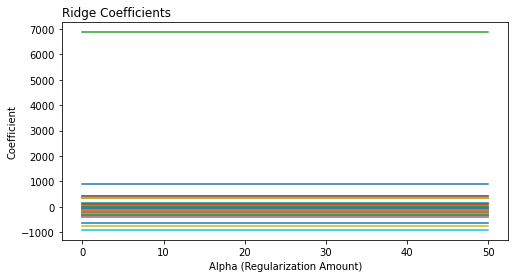

In [20]:
coefficients_ridge = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients_ridge = coefficients_ridge.reset_index()
coefficients_ridge = coefficients_ridge.rename(columns={'index':'coefficient_nbr'})
coefficients_ridge = coefficients_ridge.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients_ridge.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(8,4),legend=False)
)

plt.title('Ridge Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.show()

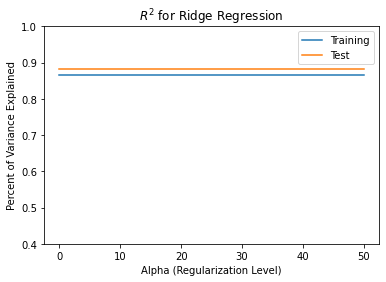

In [21]:
ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])

ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.ylim(0.4, 1)
plt.show()